## Занятие 10
## Математический анализ
## Кусочные функции, замена переменной в интеграле

In [1]:
import sympy
from sympy import S, Symbol, symbols, solve, solveset, integrate, Integral, diff, plot, Piecewise, latex
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
%matplotlib inline

### Задача 1
Описать функцию $F(x,a)=\int_a^x f(t)\,dt$, аргументами которой служат параметр $a$, функция $f$ и верхний предел $x$.

Построить на одном графике $F(x, a)$ для функции $f(t) = t^2\sin{t}$ при $a = 1/2, 1, 2$, $x \in [-\pi, \pi]$.

Найти производную построенной $F(x, a)$ по $x$ и сравнить с функцией $f$.

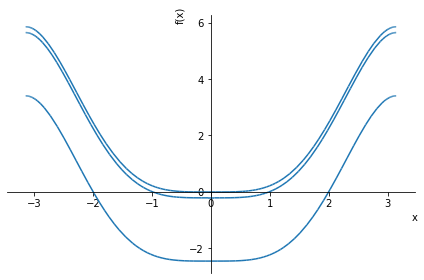

x**2*sin(x)

In [ ]:
from sympy.abc import x, t

def F(a, x):
    return integrate(t**2 * Sin(t), (t, a, x))
a = [S(1)/2, 1, 2]

plot(F(S(1)/2, x), F(1, x), F(2, x), (x, -Pi, Pi))
display(F(a[0], x).diff())

### Задача 2.
$$
sign(x)=\left\{\begin{matrix}
-1,\quad x<0\\
0,\quad x=0\\
1,\quad x>0
\end{matrix}\right.
$$
Описать кусочную функцию $sign(x)$ и функцию $F(x)=\int_{-1}^x sign(t)\,dt$, аргумент обеих функций $x$. Построить график $sign(x)$ красной сплошной линией и $F(x)$ зеленой в одной плоскости на интервале $[-1, 2]$.

Piecewise((-x - 1, x < -1), (x - 2*Min(0, x) - 1, True))

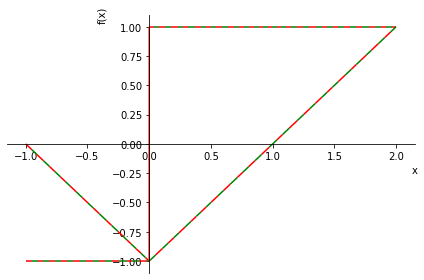

In [2]:
x = Symbol('x')
sign = Piecewise((-1, x < 0), (0, x == 0), (1, True))

def func1 (t):
    return sign.integrate((x, -1, t))

display(func1(x))
plot(sign, func1(x), (x, -1, 2), line_color= ('red', 'green'))

### Задача 3.
Построить график зависимости  от $x$ площади под графиком функции $\sin t$ на отрезке $[0,x]$ при $x$ из $[\pi/2, \pi]$.
Подписать вертикальную ось $S(x)$.

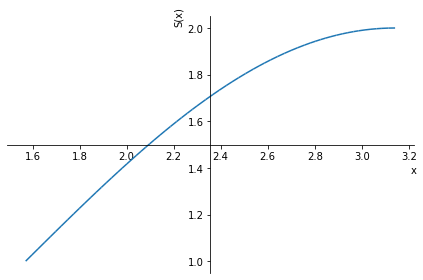

In [5]:
t = Symbol('t', positive = True)
def func2(x):
  return Sin(t).integrate((t, 0, x))

plot(func2(x), (x, Pi/2, Pi), ylabel='S(x)')

### Задача 4.
В неопределенном интеграле $\int \frac1{2\sqrt x}e^{\sqrt x},\,dx$ провести замену переменной $x=u^2$, вычислить полученный интеграл, сделать обратную замену и проверить правильность полученного результата дифференцированием.
#### Указание.
Нужно использовать положительный символ $u$.

In [ ]:
x, u = symbols('x u', positive=True)
I = Integral((1/(2 * sympy.sqrt(x))*Exp(sympy.sqrt(x))), x)
display(I)
display(I.transform(x, u**2))

res = I.integrate(I.limits)
display(res)
display(sympy.simplify(I.transform(u**2, x).diff()))

Integral(exp(sqrt(x))/(2*sqrt(x)), x)

Integral(exp(u), u)

2*sqrt(x)*exp(sqrt(x)) - 2*exp(sqrt(x))

exp(sqrt(x))/(2*sqrt(x))

### Задача 5.
В определенном интеграле $$\int_1^2 (x-1)^3e^{(x-1)^4}\,dx$$ провести замену переменной $u = (x-1)^4$ и вычислить полученный интеграл.

In [ ]:
x, y = symbols('x y', positive=True)
I = Integral((x-1)**3 * Exp((x-1)**4), (x, 1, 2))
display(I)

x, u = symbols('x u', positive=True)
I1 = I.transform((x-1)**4, u)
display(I1)
display(I1.integrate(I1.limits))

Integral((x - 1)**3*exp((x - 1)**4), (x, 1, 2))

Integral(exp(u)/4, (u, 0, 1))

-1/4 + E/4

### Индивидуальное задание
Дана функция $f(x)$, вычислить площадь $s$ под графиком $f(x)$ на $[a,b]$.
Построить график функции $f(x)$ на $[a,b]$ с заголовком  $\int_a^b f(x)\,dx = s$, где $a$, $b$, $f$ нужно подставить из условия,  $s$ - вычисленная площадь. Включить в легенду подпись $f(x)$, где вместо $f(x)$ должна быть соответствующая формула из условия, например $f(x) = 2xe^{x^2}$.

Для автоматического получения формулы для легенды нужно воспользоваться функцией latex пакета SymPy (mode='inline').

f(x) = 5√7 x tan (x) a = 4 b = 10

5*Integral(x**(1/7)*tan(x), (x, 4, 10))

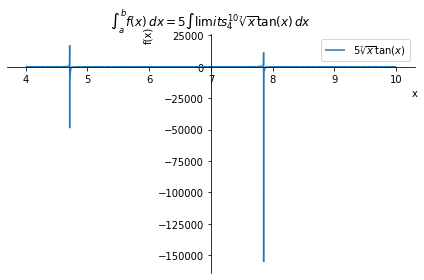

In [23]:
f = 5*x**(S(1)/7)*sympy.tan(x)
result = f.integrate((x, 4, 10)) # Это даже вольфрам не считает, поэтому не получается получиь результат.
display(result) 

plot(f, (x, 4, 10), title = '$\int_a^b f(x)\,dx = ' + sympy.latex(result) + '$', legend=True,
 label = '$' + sympy.latex(f) + '$')